In [55]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


/kaggle/input/credit-card-data/credit card fraud data.csv


In [56]:
df= pd.read_csv("/kaggle/input/credit-card-data/credit card fraud data.csv")
df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698395 entries, 0 to 698394
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              698395 non-null  float64
 1   distance_from_last_transaction  698395 non-null  float64
 2   ratio_to_median_purchase_price  698395 non-null  float64
 3   repeat_retailer                 698395 non-null  int64  
 4   used_chip                       698395 non-null  int64  
 5   used_pin_number                 698395 non-null  int64  
 6   online_order                    698395 non-null  int64  
 7   fraud                           698395 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 42.6 MB


In [58]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,698395.000000,698395.000000,698395.000000,698395.000000,698395.000000,698395.000000,698395.000000,698395.000000
mean,26.644337,5.024836,1.824474,0.881493,0.350073,0.100976,0.650556,0.087471
std,64.901892,26.467154,2.803088,0.323208,0.476993,0.301297,0.476795,0.282524
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.879650,0.295872,0.475339,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.972723,0.997368,0.997548,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.786125,3.351624,2.098124,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#checking the number of missing values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

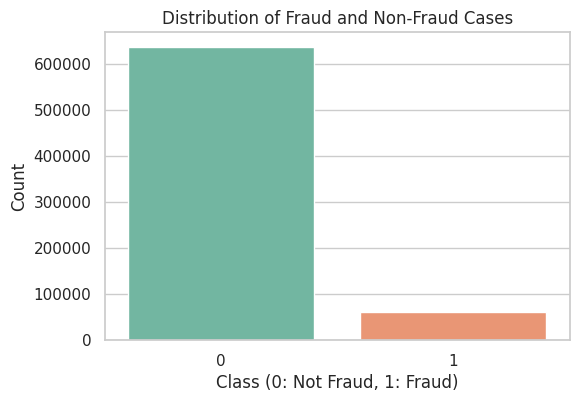

In [60]:
# Counting the occurrences of 'fraud' and 'not fraud' cases
value_counts = df["fraud"].value_counts()

# Creating a bar plot
plt.figure(figsize=(6, 4))  
sns.set(style="whitegrid")  
sns.barplot(x=value_counts.index, y=value_counts.values, palette="Set2")

# Adding labels and title
plt.xlabel("Class (0: Not Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.title("Distribution of Fraud and Non-Fraud Cases")

# Showing the plot
plt.show()

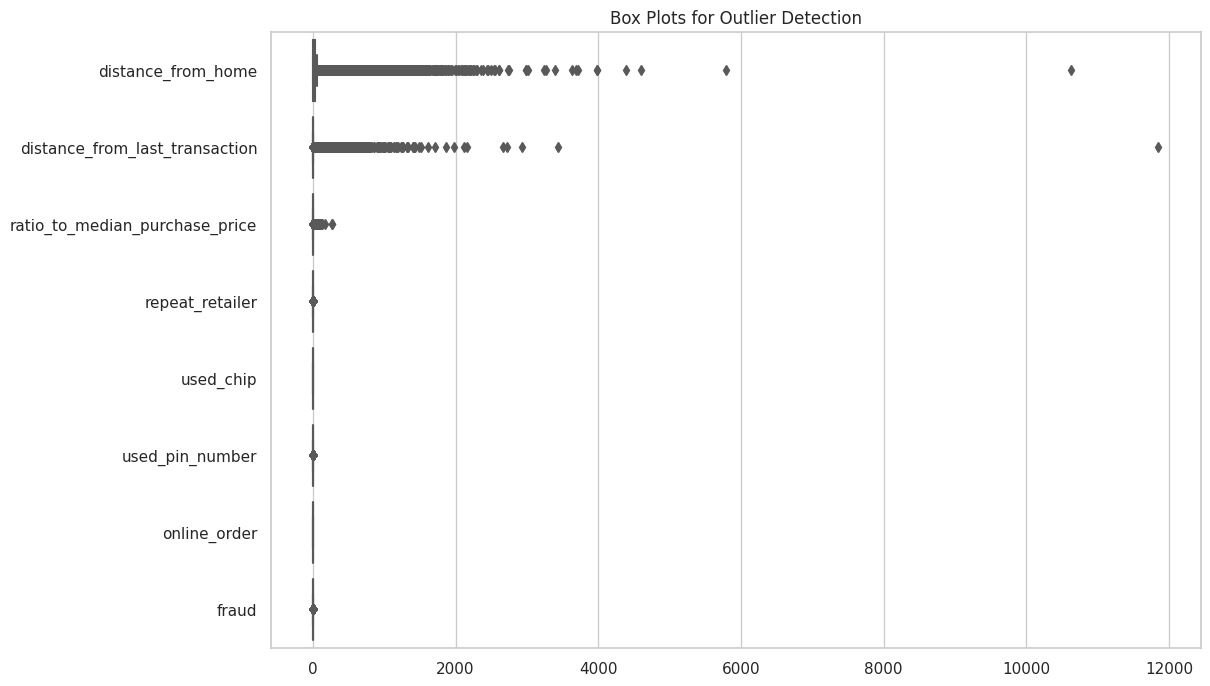

In [61]:
# Creating box plots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="Set2")

# Setting the title
plt.title("Box Plots for Outlier Detection")

# Showing the plot
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

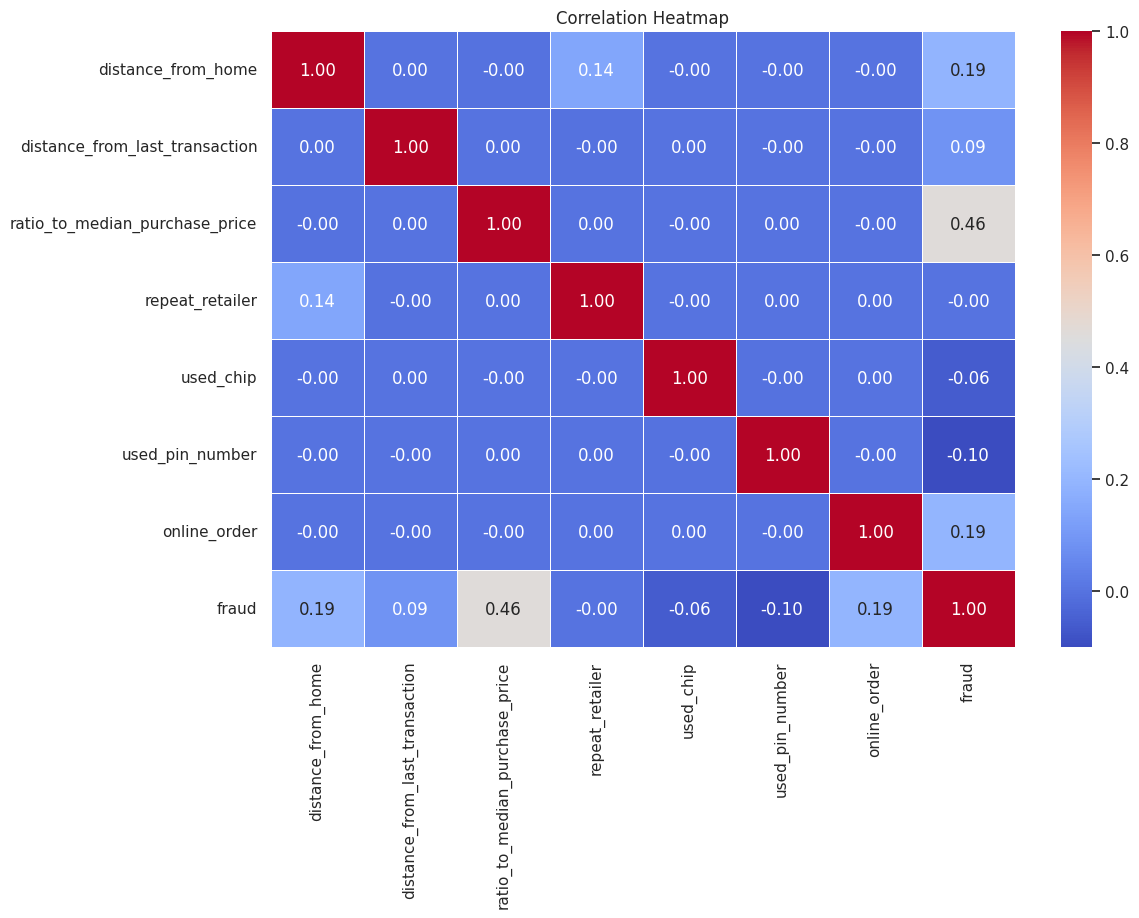

In [62]:
# Calculating the correlation matrix
corr_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")

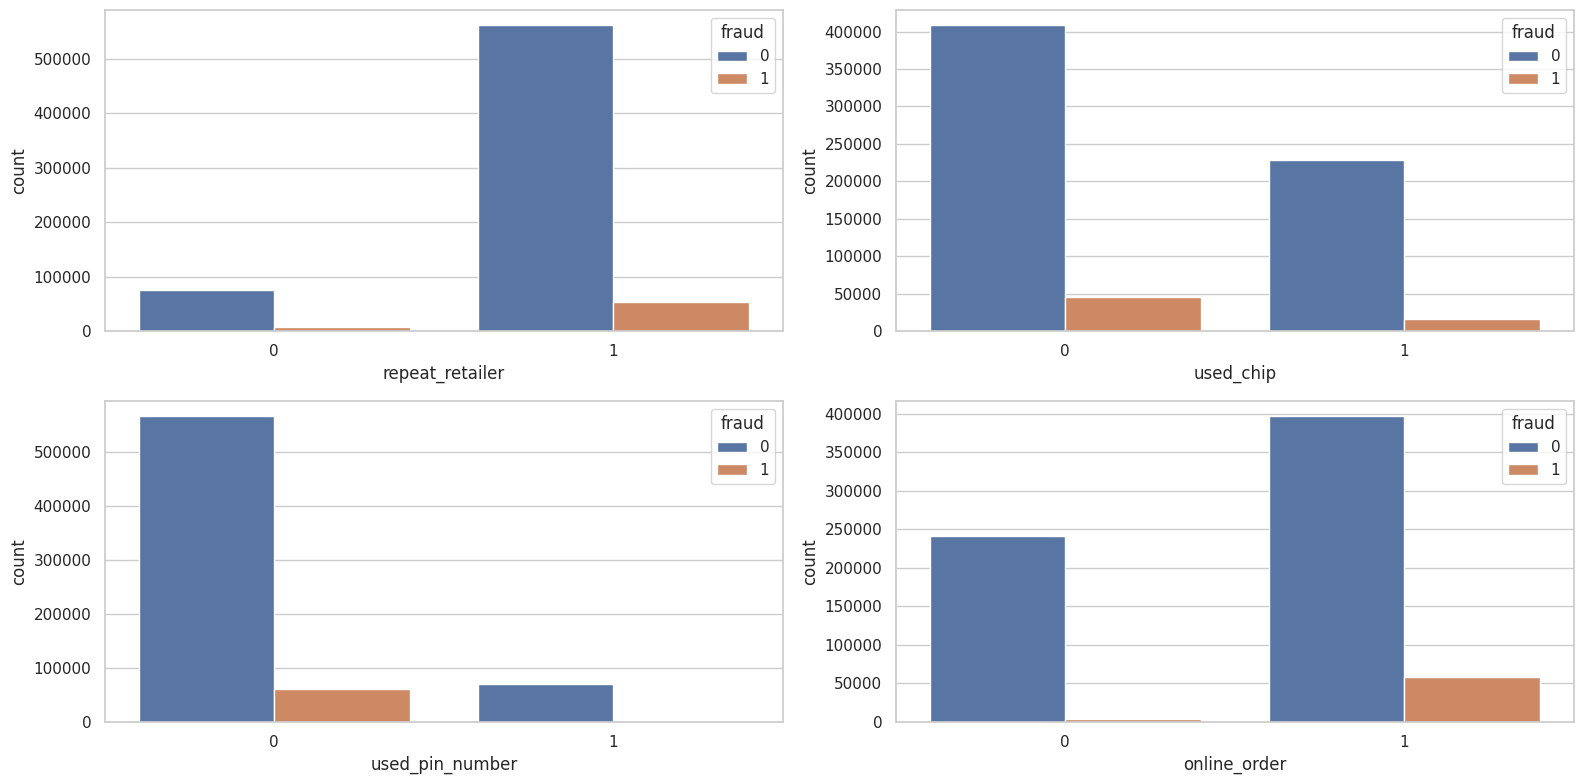

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
_ = sns.countplot(data=df, x='repeat_retailer', hue='fraud', ax=axes[0][0])
_ = sns.countplot(data=df, x='used_chip', hue='fraud', ax=axes[0][1])
_ = sns.countplot(data=df, x='used_pin_number', hue='fraud', ax=axes[1][0])
_ = sns.countplot(data=df, x='online_order', hue='fraud', ax=axes[1][1])
_ = plt.tight_layout()
plt.show()


**TRAINING THE MODELS**

In [68]:
# Splitting the data into features (X) and the target (y)
X = df.drop(columns=['fraud'])
y = df['fraud']

In [69]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Standardizing the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encoding the target variable (fraud or not fraud)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [71]:
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
baseline_model = Sequential()

# Add an input layer and one hidden layer
baseline_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Add the output layer
baseline_model.add(Dense(2, activation='softmax')) 

# Compiling the model
baseline_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
baseline_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluating the model
baseline_scores = baseline_model.evaluate(X_test, y_test)
print("Baseline Model Metrics:")
print("Accuracy:", baseline_scores[1])


Epoch 1/20
8730/8730 [==============================] - 16s 2ms/step - loss: 0.0550 - accuracy: 0.9804 - val_loss: 0.0307 - val_accuracy: 0.9895
Epoch 2/20
8730/8730 [==============================] - 17s 2ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0190 - val_accuracy: 0.9950
Epoch 3/20
8730/8730 [==============================] - 16s 2ms/step - loss: 0.0165 - accuracy: 0.9952 - val_loss: 0.0155 - val_accuracy: 0.9953
Epoch 4/20
8730/8730 [==============================] - 17s 2ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.0150 - val_accuracy: 0.9955
Epoch 5/20
8730/8730 [==============================] - 16s 2ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0136 - val_accuracy: 0.9961
Epoch 6/20
8730/8730 [==============================] - 16s 2ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.0125 - val_accuracy: 0.9957
Epoch 7/20
8730/8730 [==============================] - 16s 2ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0111 - val_ac

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_true_baseline = (y_test[:, 1] >= 0.5).astype(int)

# Convert predicted probabilities to binary labels using a threshold 
threshold = 0.5
y_pred_baseline = (baseline_model.predict(X_test)[:, 1] >= threshold).astype(int)

# Calculate evaluation metrics
accuracy_baseline = accuracy_score(y_true_baseline, y_pred_baseline)
precision_baseline = precision_score(y_true_baseline, y_pred_baseline)
recall_baseline = recall_score(y_true_baseline, y_pred_baseline)
f1_baseline = f1_score(y_true_baseline, y_pred_baseline)

# Print the metrics
print("Baseline Model Metrics:")
print("Accuracy:", accuracy_baseline)
print("Precision:", precision_baseline)
print("Recall:", recall_baseline)
print("F1 Score:", f1_baseline)


4365/4365 [==============================] - 5s 1ms/step
Baseline Model Metrics:
Accuracy: 0.9961483114856206
Precision: 0.9761203794569839
Recall: 0.9798062715481859
F1 Score: 0.9779598525194593


In [72]:
from keras.layers import Dropout

# Create a sequential model
deep_model = Sequential()

# Add an input layer and multiple hidden layers
deep_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
deep_model.add(Dropout(0.5))  
deep_model.add(Dense(32, activation='relu'))
deep_model.add(Dropout(0.5))  
deep_model.add(Dense(16, activation='relu'))
deep_model.add(Dropout(0.5))  

# Add the output layer
deep_model.add(Dense(2, activation='softmax'))  # Two classes: fraud or not fraud

# Compile the model
deep_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
deep_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluating the model
deep_scores = deep_model.evaluate(X_test, y_test)
print("Deep Neural Network Model Metrics:")
print("Accuracy:", deep_scores[1])


Epoch 1/20
8730/8730 [==============================] - 22s 2ms/step - loss: 0.0647 - accuracy: 0.9760 - val_loss: 0.0190 - val_accuracy: 0.9933
Epoch 2/20
8730/8730 [==============================] - 21s 2ms/step - loss: 0.0335 - accuracy: 0.9886 - val_loss: 0.0152 - val_accuracy: 0.9942
Epoch 3/20
8730/8730 [==============================] - 21s 2ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0115 - val_accuracy: 0.9962
Epoch 4/20
8730/8730 [==============================] - 20s 2ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0133 - val_accuracy: 0.9951
Epoch 5/20
8730/8730 [==============================] - 22s 2ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0106 - val_accuracy: 0.9965
Epoch 6/20
8730/8730 [==============================] - 23s 3ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0102 - val_accuracy: 0.9964
Epoch 7/20
8730/8730 [==============================] - 23s 3ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0099 - val_ac

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_true_deep = (y_test[:, 1] >= threshold).astype(int)


# Convert predicted probabilities to binary labels using a threshold 
threshold = 0.5
y_pred_deep = (deep_model.predict(X_test)[:, 1] >= threshold).astype(int)

# Calculate evaluation metrics
accuracy_deep = accuracy_score(y_true_deep, y_pred_deep)
precision_deep = precision_score(y_true_deep, y_pred_deep)
recall_deep = recall_score(y_true_deep, y_pred_deep)
f1_deep = f1_score(y_true_deep, y_pred_deep)

# Print the metrics
print("Deep Neural Network Model Metrics:")
print("Accuracy:", accuracy_deep)
print("Precision:", precision_deep)
print("Recall:", recall_deep)
print("F1 Score:", f1_deep)


4365/4365 [==============================] - 6s 1ms/step
Deep Neural Network Model Metrics:
Accuracy: 0.9975515288626065
Precision: 0.987724501565332
Recall: 0.9841569528813002
F1 Score: 0.9859375
